## Analysis 3

- The analysis has been done to compare the shares of the technology firms using different mechanisms, this would advice and give a clear contrasting picture for an individual to choose wisely.

In [90]:
#importing required packages including numpy

from pandas_datareader import DataReader
# For time stamps
import datetime
import matplotlib.pyplot as plt

import pandas as pd
from pandas import Series,DataFrame
import numpy as np

import matplotlib as mpl
mpl.rc('figure', figsize=(15, 15))

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [91]:
# Set up End and Start times
start = datetime.datetime(2017,1,1)
end = datetime.date.today()

#### Fetching the required data into the dataframes

In [92]:
cisco = pd.read_csv('/data/CSCO.csv', index_col='Date', parse_dates=True)
cisco = cisco.reset_index()
mask = (cisco['Date'] > '2017-1-1') & (cisco['Date'] <= '2017-4-12')
cisco = cisco.loc[mask]
cisco = cisco.set_index(['Date'])
cisco = cisco[['Adj. Close']]
cisco = cisco.rename(columns={'Adj. Close': 'CSCO'})
cisco.head()


,CSCO
Date,
2017-04-12,32.61
2017-04-11,32.92
2017-04-10,33.02
2017-04-07,32.96
2017-04-06,33.08


In [93]:
microsoft = pd.read_csv('/data/MSFT.csv', index_col='Date', parse_dates=True)
microsoft = microsoft.reset_index()
mask = (microsoft['Date'] > '2017-1-1') & (microsoft['Date'] <= '2017-4-12')
microsoft = microsoft.loc[mask]
microsoft = microsoft.set_index(['Date'])
microsoft = microsoft[['Adj. Close']]
microsoft = microsoft.rename(columns={'Adj. Close': 'MSFT'})
microsoft.head()



,MSFT
Date,
2017-04-12,65.23
2017-04-11,65.48
2017-04-10,65.53
2017-04-07,65.68
2017-04-06,65.73


In [94]:
google = pd.read_csv('/data/GOOGL.csv', index_col='Date', parse_dates=True)
google = google.reset_index()
mask = (google['Date'] > '2017-1-1') & (google['Date'] <= '2017-4-12')
google = google.loc[mask]
google = google.set_index(['Date'])
google = google[['Adj. Close']]
google = google.rename(columns={'Adj. Close': 'GOOGL'})
google.head()

,GOOGL
Date,
2017-04-12,841.460
2017-04-11,839.880
2017-04-10,841.700
2017-04-07,842.100
2017-04-06,845.095


In [95]:
apple = pd.read_csv('/data/AAPL.csv', index_col='Date', parse_dates=True)
apple = apple.reset_index()
mask = (apple['Date'] > '2017-1-1') & (apple['Date'] <= '2017-4-12')
apple = apple.loc[mask]
apple = apple.set_index(['Date'])
apple = apple[['Adj. Close']]
apple = apple.rename(columns={'Adj. Close': 'AAPL'})
apple.head()

,AAPL
Date,
2017-04-12,141.79
2017-04-11,141.63
2017-04-10,143.14
2017-04-07,143.34
2017-04-06,143.66


Using concatenate to merge the four different dataframes into one to analyze the data

In [96]:
result = pd.concat([apple, microsoft,google,cisco], axis=1)
result.head()

,AAPL,MSFT,GOOGL,CSCO
Date,,,,
2017-04-12,141.79,65.23,841.460,32.61
2017-04-11,141.63,65.48,839.880,32.92
2017-04-10,143.14,65.53,841.700,33.02
2017-04-07,143.34,65.68,842.100,32.96
2017-04-06,143.66,65.73,845.095,33.08


In [97]:
# Calculating the technical firms return
itreturns = result.pct_change()

#### Join plot of Microsoft and Cisco to determine the correlation

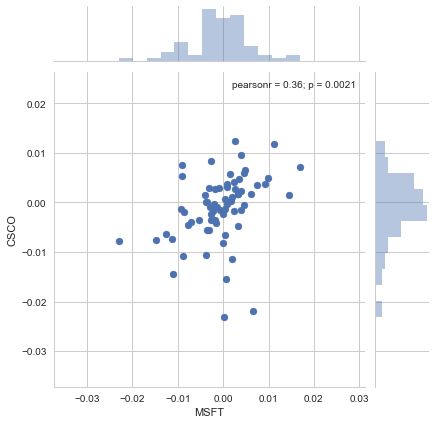

In [98]:
# To compare the daily returns of MSFT and CSCO
sns.jointplot('MSFT','CSCO',itreturns,kind='scatter')

#### Pair Grid of all the four firms

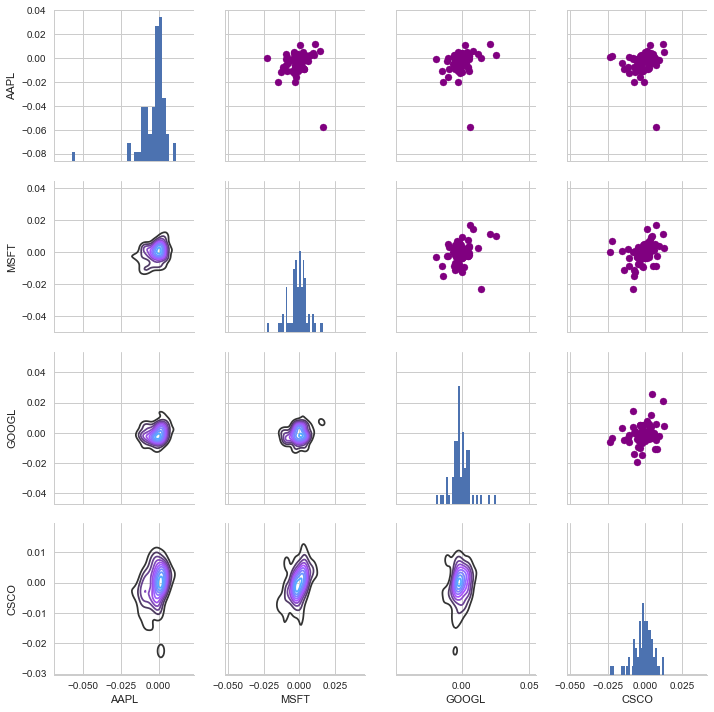

In [99]:
returns_fig = sns.PairGrid(itreturns.dropna())
returns_fig.map_upper(plt.scatter,color='purple')
returns_fig.map_lower(sns.kdeplot,cmap='cool_d')
returns_fig.map_diag(plt.hist,bins=30)

#### Numerical depiction of the pair grid using heatmap of seaborn

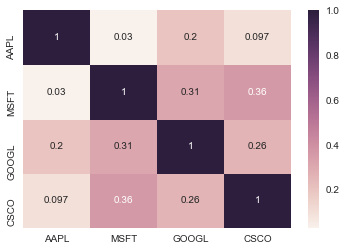

In [100]:
sns.heatmap(itreturns.dropna().corr(),annot=True)

#### Risk Analysis

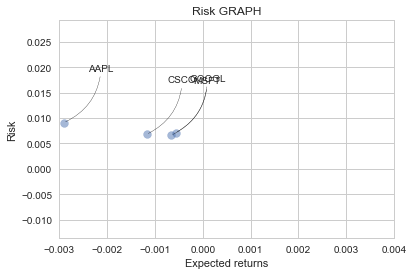

In [102]:
returns = itreturns.dropna()
area = np.pi*20
plt.scatter(returns.mean(), returns.std(),alpha = 0.5,s =area)
plt.xlim([-0.003,0.004])
plt.xlabel('Expected returns')
plt.ylabel('Risk')
plt.title('Risk GRAPH')

# Standard deviation is calculated and plotted agains the returns mean
for label, x, y in zip(returns.columns, returns.mean(), returns.std()):
    plt.annotate(
        label, 
        xy = (x, y), xytext = (50, 50),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        arrowprops = dict(arrowstyle = '-', connectionstyle = 'arc3,rad=-0.3'))

## Conclusion

- The joint plot of Microsoft and Cisco show that there is a weak correlation i.e 0.36, the scattered plot also shows that there is no trend line being formed, hence they is a weak correlation between them.
- A quick glane at the pair grid formed by seaborn tells us that there is a better correlation between microsoft and cisco, but it does not give a clear idea. The heatmap has been plotted to show the numerical comparison between them.
- The heatmap tells us that there is a better correaltion of 0.36 between Microsoft and Cisco. This tells that inside the technology industry Microsoft and Cisco being core networking companies have similar trends.The trends could be due to a change of the products which are common to them.
- The risk plot tells us that Google and Microsoft have almost the same returns and risk when compared to others, so we can choose both of them in contrast to others to invest. 